# Branching ratios

A newly discovered particle was found to be able to decay in two different ways (two different decay channels): A and B. The probability $f_A$ for decay A to happen is called its _branching ratio_.

## Tasks


a) For a fixed number N of observed decays, explain why the number of decays to channel A should follow a binomial distribution.

b) Write down the conditional p.d.f. (aka posterior probability distribution) obtained via Bayes' theorem $P(f_A|\vec{k})$ where $\vec{k}$ are your observations. Explain the parameters and the different terms. What do you want to describe with $P(f_A|\vec{k})$?

c) Assuming a flat prior for the branching ratio $\pi(f_A)=1 \forall f_A\in[0,1]$ calculate and draw the posterior probability distribution for $f_A$ after measuring a single decay, which went to A.

d) Using the previous result as a prior, calculate and draw the new posterior after each of the observed additional decays "A", "B", "B", "A"

e) Calculate and draw the posterior after observing 100 decays, with 63 going to A.


### Hints

1. It is recommended to not start coding right away.
1. Realize what **one experiment** means in this task and how you then construct your Likelihood.

You can solve this problem by explicitly going through the single steps of the calculations. When representing the distributions with numpy arrays, 'np.sum()' comes in handy in the calculation of the normalization. Alternatively, you can also use the beta pdf which was discussed in the lecture and which is accessible through the scipy.stats package 'from scipy.stats import beta‘.


### Modules etc.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
#import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log, pi, sin
#from scipy.optimize import curve_fit 
#from scipy.stats import chi2
#from glob import glob
#from astropy.io import fits
#from astropy.visualization import simple_norm
#import matplotlib.patches as mpatches
#import statistics as st
#import pandas as pd
#from scipy.signal import find_peaks
from sympy import integrate, Symbol, lambdify

### Solutions

a) For a fixed number N of observed decays, the number of decays to channel A should follow a binomial distribution since we're regarding a discrete amount of events with a binary outcome. It's either A or not A, i.e. B.

b) The probability density function (pdf) f(x) is used to find the probability of finding a value in the interval $[x, x + \text{d}x]$ according to

$$ P(x' \in [x, x + \text{d}x]) = f(x') \cdot \text{d}x.$$

With Bayes' Theorem, we know that we can infer $P(\lambda)$ for a parameter $\lambda$ to be determined by starting with an initial predefined probability and using this iteratively to approach a better and better result. In this case, we can use the $\vec{k}$ measured values and the probability density function $f_A$ to determine what we call the likelihood function

$$ L(\vec{k}, f_A) = \prod_{i = 1}^N f(k_i, f_A)$$

It's important to note, that $f(k_i, f_A)$ is the probability density function for a fixed measured value $k_i$, while $f_A$ is the expected probability density function. This can be a little bit confusing, but we can think of it like this: If we measure value A, then the probability density function $f(A, f_A)$ should just be equal to $f_A$, but if we measure B, then we should have a probability density function $f(B, f_A) = f_B = 1 - f_A$. Using this, we should get 

$$ L(\vec{k}, f_A) = (f_A)^n \cdot (1 - f_A)^{N - n} $$

where $n$ is the amount of times we measured A and respectively $N - n$ the amount of times we measured B. We then use this to apply Bayes' theorem

$$ P(\vec{k},\, f_A) = \dfrac{L(\vec{k}, f_A) \cdot \pi(f_A)}{\int L(\vec{k}, f_A) \pi(f_A) \text{d}f_A} $$

where we've introduced yet another function, $\pi(\vec{k})$, independent of the parameter $f_A$ to be determined. This is the prior probability distribution. Since in a) we justified why the the number of decays should follow a binomial distribution, then the prior probability function should also follow a binomial distribution:

$$ \pi(f_A) = \binom{N}{n} (f_A)^n (1 - f_A)^{N - n}. $$

We would have to solve the integral to determine the probability, but for this task it suffices that we have laid out the terms necessary to find it.

c) Let's assume a constant prior probability distribution $\pi(f_A) = 1\ \forall f_A \in [0,1]$. In this case, the probability reduces to

$$ P(\vec{k},\, f_A) = \dfrac{(f_A)^N (1 - f_A)^{N - n}}{\int_0^1 (f_A)^N (1 - f_A)^{N - n} \text{d}f_A} $$

For a single decay, $N = 1$ which was measured A, $n = 1$, we get simply

$$ P(A, f_A) = \dfrac{f_A}{\int_0^1 f_A \text{d}f_A} = 2 f_A. $$

Since the probability depends linearly on $f_A$, the plot is pretty straight-forward:

In [2]:
# Default plot style
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = (5,10)

rcParams['figure.figsize'] = (12, 7)
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 14
rcParams['legend.fontsize'] = 14

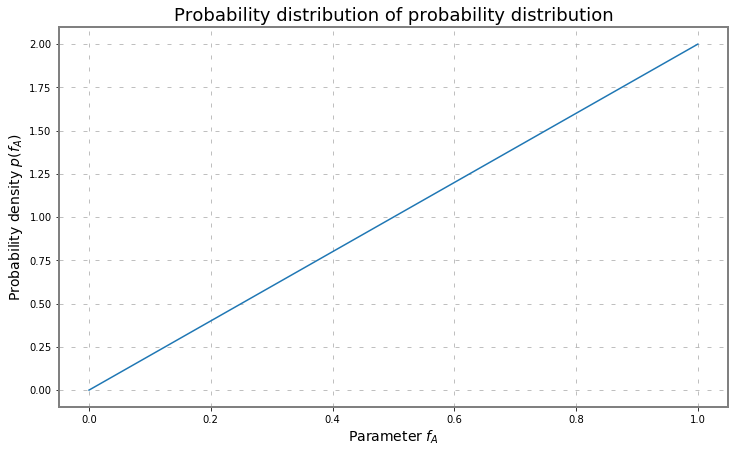

In [3]:
# Define the probability function
f_A = np.linspace(0, 1, 100)
P = 2 * f_A

plt.plot(f_A, P)
plt.title('Probability distribution of probability distribution')
plt.xlabel('Parameter $f_A$')
plt.ylabel('Probability density $p(f_A)$')

plt.show()

d) We now use this result as a prior probability distribution and try to improve upon it. 

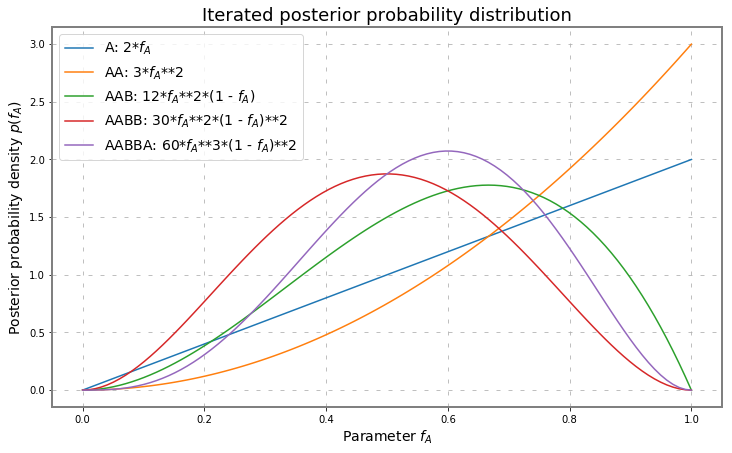

In [4]:
# Observed decays
k = ['A', 'A', 'B', 'B', 'A']
fA = Symbol('$f_A$')
ks = ['A', 'AA', 'AAB', 'AABB', 'AABBA']


# posterior:
'''
For the posterior function, we will iterate through each measurement and
improve the probability distribution before going through to the next one.
'''
def posterior(k):
    posteriors = np.array([]) # empty list to save the intermediate results
    ks = np.array([])
    priors = np.array([1])
    
    for i in range(len(k)):
        if k[i] == 'A': # This corresponds to the probability density f(k_i, f_A)
            f = fA # We've previously defined fA as a Symbol
        else:
            f = 1 - fA
            
        ''' Next we integrate symbolically, because we'd also like to observe
        the form of each new probability function'''
        post = f * priors[i] / (integrate(f * priors[i], (fA, 0, 1)))
        priors = np.append(priors, post)
        posteriors = np.append(posteriors, post)
        
    return posteriors
        
     
posts = posterior(k)

''' We're in too deep now to stop. This is overly complicated and not what
the exercise is really about, but I wouldn't feel right leaving the idea 
that I had in my head unfinished. We now want to evaluate the symbolic 
expressions we found for the iterated probability distributions for different
values of f_A. For that we use the function "lambdify" '''
Posts = lambdify(fA, posts, 'numpy')
Posts(f_A)

# Now we make a nice little plot
fig, ax = plt.subplots()
ax.set_title('Iterated posterior probability distribution')
for i in range(len(Posts(f_A))):
    ax.plot(f_A, Posts(f_A)[i], 
            label = ks[i] + ': ' + str(posts[i]))

ax.legend(loc = 'best')
ax.set_ylabel('Posterior probability density $p(f_A)$')
ax.set_xlabel('Parameter $f_A$')

fig.show()

e) As we've observed in the previous task, the Posterior probability density is given by

$$ P(f_A,\, k_N) = \dfrac{(f_A)^{n_A} (1 - f_A)^{N - n_A}}{\int_0^1 (f_A)^{n_A} (1 - f_A)^{N - n_A}\, \text{d}f_A}, $$

so for a trial with a sample size of 100, where 63 have been A, we would get

$$ P(f_A) = \dfrac{f_A^{63} (1 - f_A)^{100 - 63}}{\int_0^1 f_A^{63} (1 - f_A)^{100 - 63}\, \text{d}f_A}. $$

In [5]:
# General posterior probability function
''' We define a general posterior probability function where we can personalize
it with the number of samples and the number of "successes"
'''
def posterior_n(N, n_A):
    post = fA ** n_A * (1 - fA) ** (N - n_A) / ( integrate(fA ** n_A * (1 - fA) ** (N - n_A), (fA, 0, 1)))
    return lambdify(fA, post, 'numpy')

post_100 = posterior_n(100, 63)

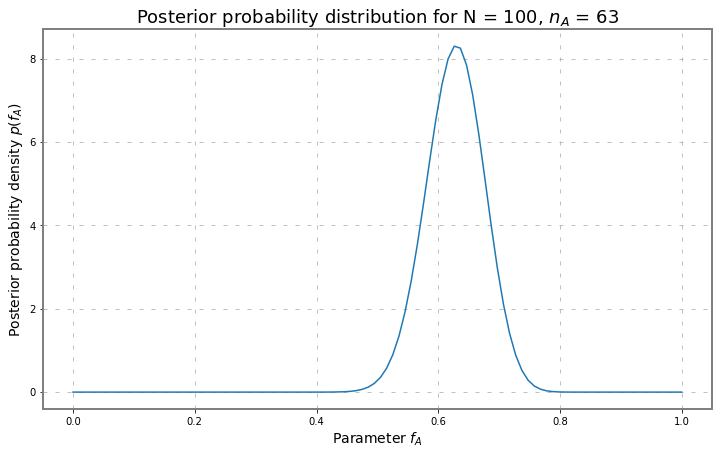

In [7]:
# Plot
fig, ax = plt.subplots()
ax.plot(f_A, post_100(f_A))
ax.set_title('Posterior probability distribution for N = 100, $n_A$ = 63')
ax.set_xlabel('Parameter $f_A$')
ax.set_ylabel('Posterior probability density $p(f_A)$')

fig.show()

For comparison, we'll study how this function changes with a smaller and larger sample size, but with the same ratio of A / B. We'll find that the width of the peak gets more narrow with ever increasing sample size, and consequently also higher to maintain the proper normalization.

In [8]:
''' Python sucks at symbolical integration, so we can define a similar 
method by integrating numerically. This has the disadvantage, that it 
depends on the spacing of our input parameter f_A '''
def posterior_num(N, n_A, func):
    return (func ** n_A * (1 - func) ** (N - n_A) 
            / (1 / len(f_A) * np.sum(func ** n_A * (1 - f_A) ** (N - n_A))))


In [9]:
post_10 = posterior_num(10, 6.3, f_A)
post_1000 = posterior_num(1000, 630, f_A)

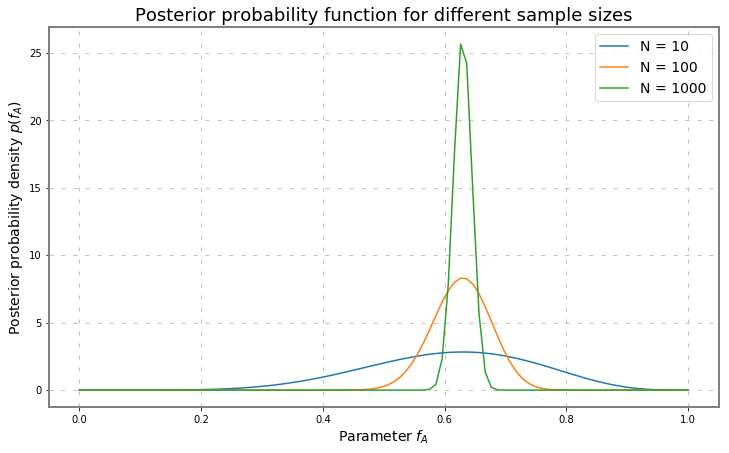

In [10]:
fig, ax = plt.subplots()
ax.set_title('Posterior probability function for different sample sizes')
ax.set_xlabel('Parameter $f_A$')
ax.set_ylabel('Posterior probability density $p(f_A)$')
ax.plot(f_A, post_10, label = 'N = 10')
ax.plot(f_A, post_100(f_A), label = 'N = 100')
ax.plot(f_A, post_1000, label = 'N = 1000')

ax.legend(loc = 'best')

fig.show()